Attribute Information

1. Age: age of the patient [years]

2. Sex: sex of the patient [M: Male, F: Female]

3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4. RestingBP: resting blood pressure [mm Hg]

5. Cholesterol: serum cholesterol [mm/dl]

6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10. Oldpeak: oldpeak = ST [Numeric value measured in depression]

11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12. Heart Disease: output class [1: heart disease, 0: Normal]

In [2]:
import pandas as pd    
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

#Load the dataset


In [3]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#Explore the dataset

In [4]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [5]:
df.shape

(918, 12)

In [6]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#Univaraite analysis

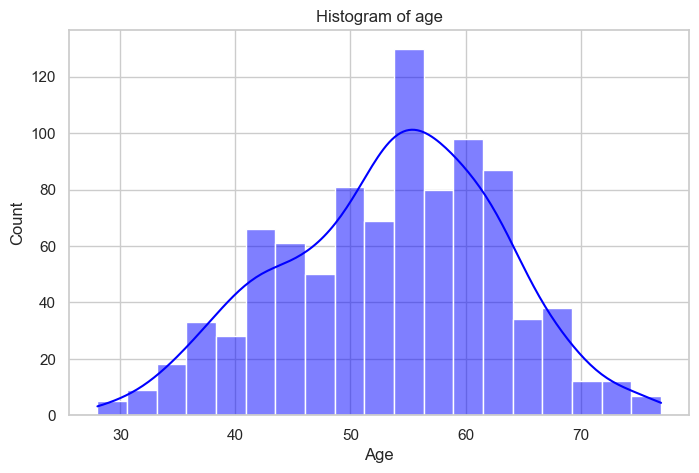

In [11]:
#Histogram of age
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, color='blue')
plt.title("Histogram of age")
plt.show()

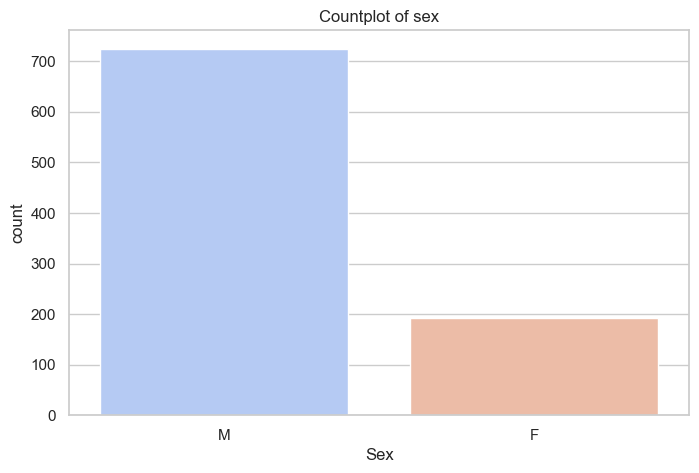

In [12]:
#Countplot of sex
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=df, palette='coolwarm')
plt.title("Countplot of sex")
plt.show()

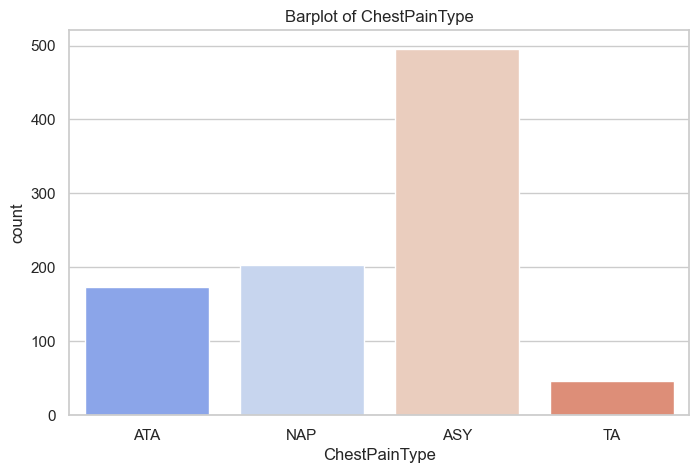

In [13]:
# 3. Barplot for ChestPainType
plt.figure(figsize=(8, 5))
sns.countplot(x='ChestPainType', data=df, palette='coolwarm')
plt.title('Barplot of ChestPainType')
plt.show()

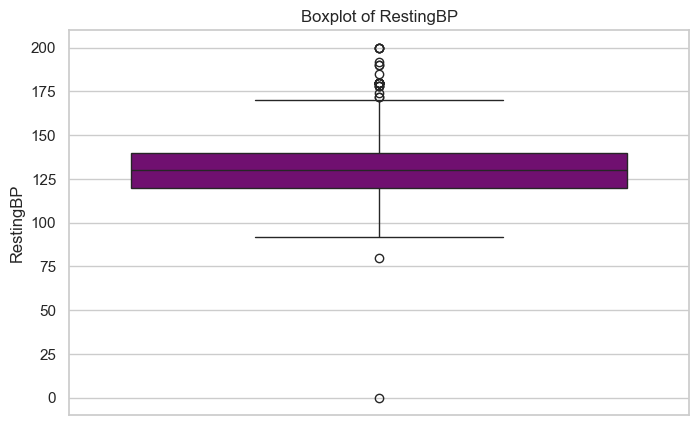

In [14]:
# 4. Boxplot for RestingBP
plt.figure(figsize=(8, 5))
sns.boxplot(y='RestingBP', data=df, color='purple')
plt.title('Boxplot of RestingBP')
plt.show()

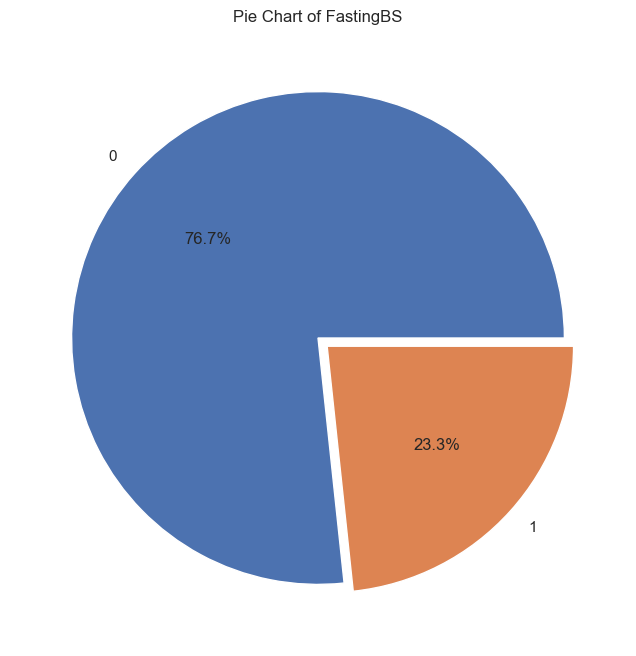

In [15]:
# 5. Pie Chart for FastingBS
fasting_counts = df['FastingBS'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fasting_counts, labels=fasting_counts.index, autopct='%1.1f%%', explode=(0,0.05))
plt.title('Pie Chart of FastingBS')
plt.show()

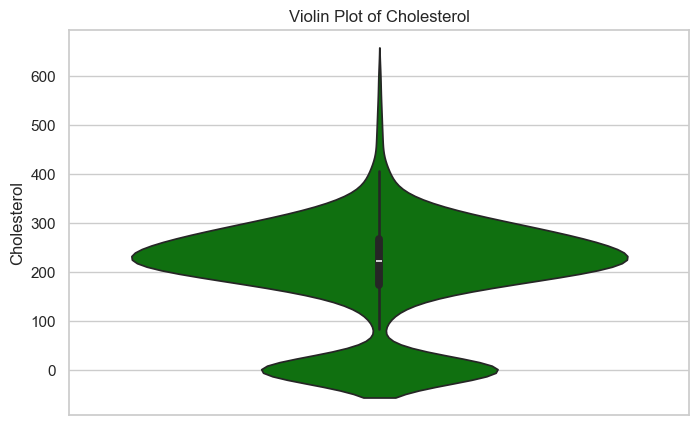

In [16]:
# 6. Violin Plot for Cholesterol
plt.figure(figsize=(8, 5))
sns.violinplot(y='Cholesterol', data=df, color='green')
plt.title('Violin Plot of Cholesterol')
plt.show()

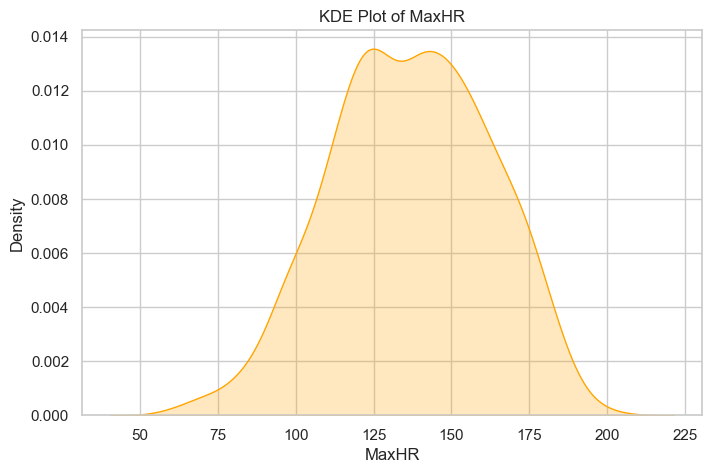

In [17]:
# 7. KDE Plot for MaxHR
plt.figure(figsize=(8, 5))
sns.kdeplot(df['MaxHR'], fill=True, color='orange')
plt.title('KDE Plot of MaxHR')
plt.show()

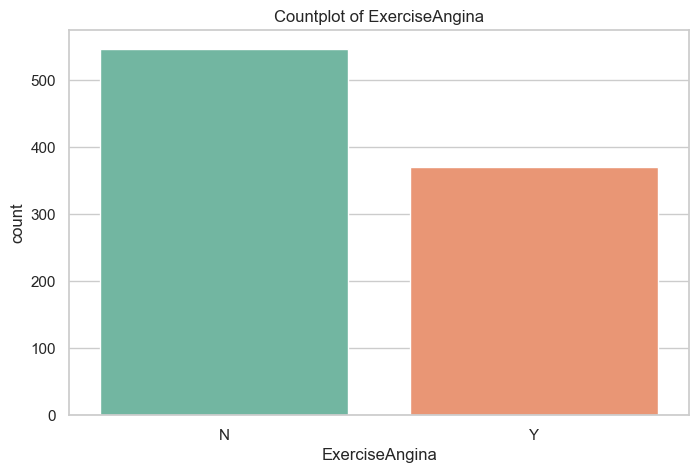

In [18]:
# 8. Countplot for ExerciseAngina
plt.figure(figsize=(8, 5))
sns.countplot(x='ExerciseAngina', data=df, palette='Set2')
plt.title('Countplot of ExerciseAngina')
plt.show()

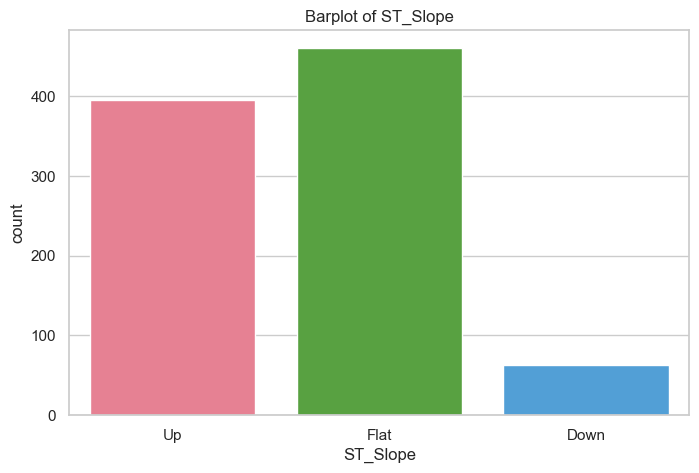

In [19]:
# 9. Barplot for ST_Slope
plt.figure(figsize=(8, 5))
sns.countplot(x='ST_Slope', data=df, palette='husl')
plt.title('Barplot of ST_Slope')
plt.show()

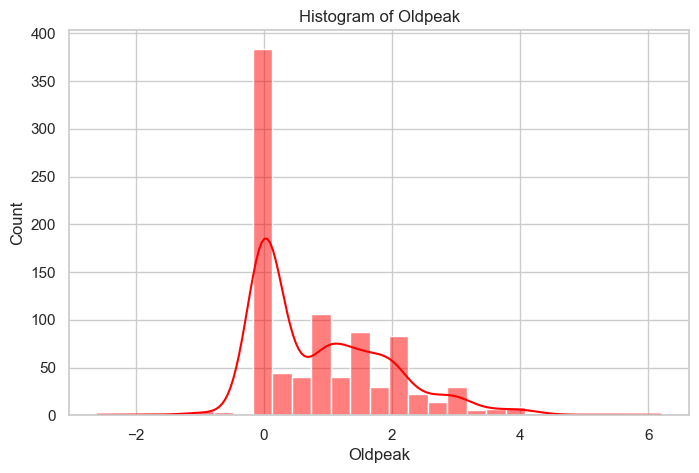

In [20]:
# 10. Histogram for Oldpeak
plt.figure(figsize=(8, 5))
sns.histplot(df['Oldpeak'], kde=True, color='red')
plt.title('Histogram of Oldpeak')
plt.show()

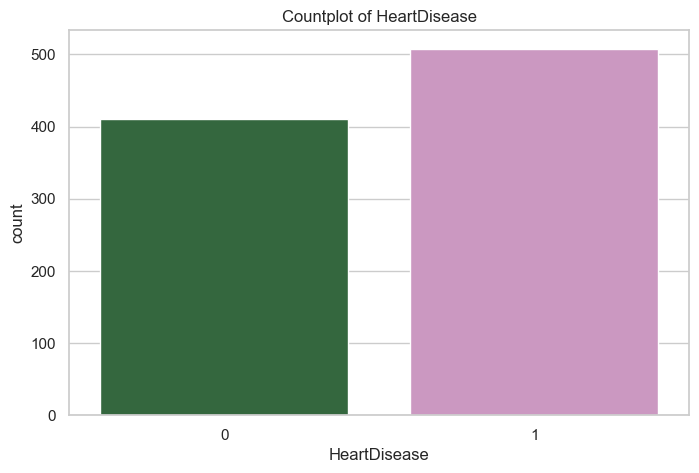

In [21]:
# 11. Countplot for HeartDisease
plt.figure(figsize=(8, 5))
sns.countplot(x='HeartDisease', data=df, palette='cubehelix')
plt.title('Countplot of HeartDisease')
plt.show()

#Multivariate analysis

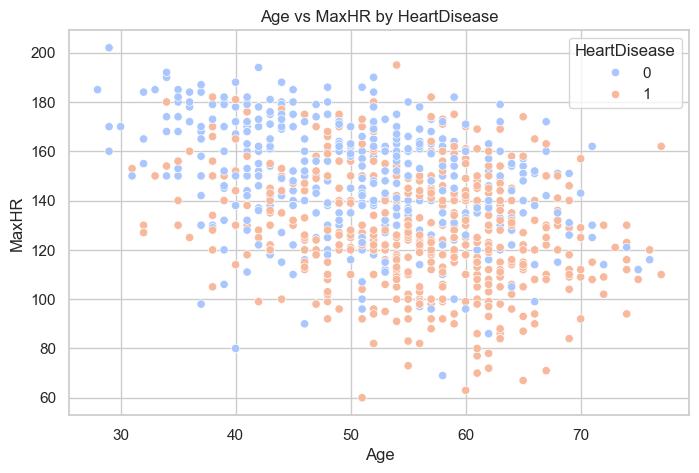

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df, palette='coolwarm')
plt.title('Age vs MaxHR by HeartDisease')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

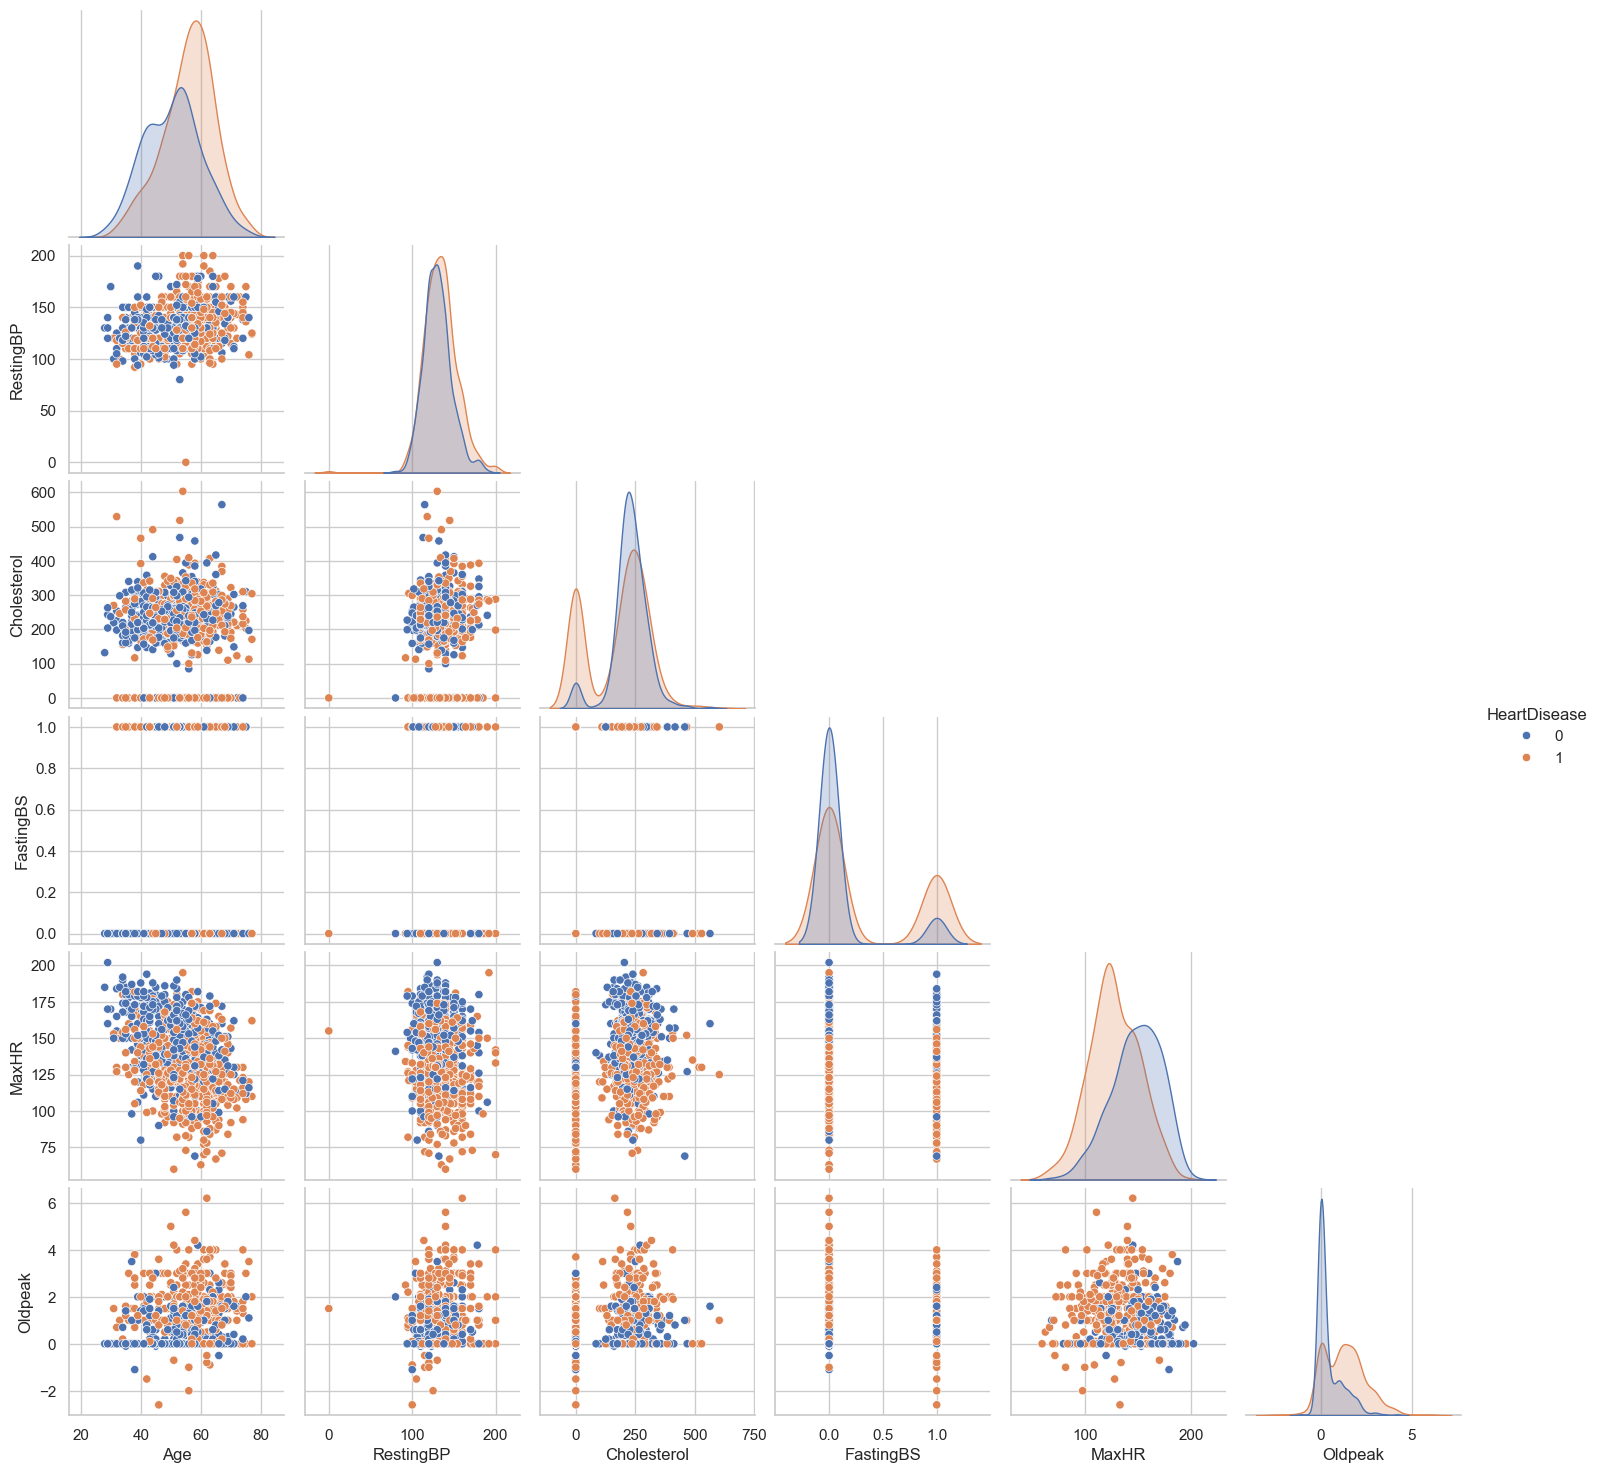

In [23]:
# 2. Pairplot for Numerical Features
sns.pairplot(df, hue="HeartDisease", diag_kind="kde", corner=True)
plt.show()

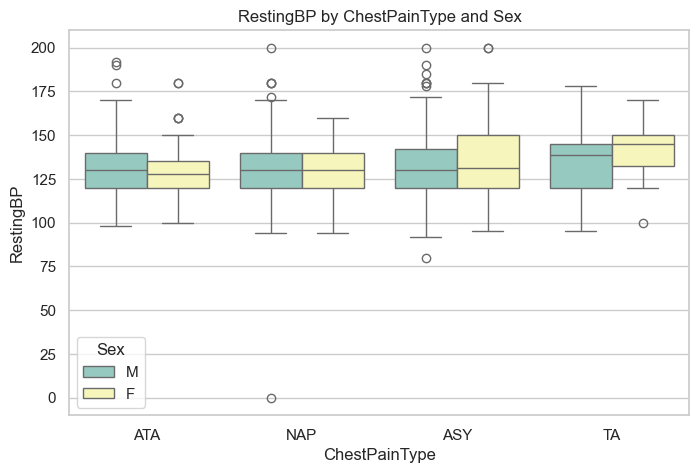

In [24]:
# 3. Boxplot: RestingBP vs ChestPainType
plt.figure(figsize=(8, 5))
sns.boxplot(x='ChestPainType', y='RestingBP', hue='Sex', data=df, palette='Set3')
plt.title('RestingBP by ChestPainType and Sex')
plt.show()

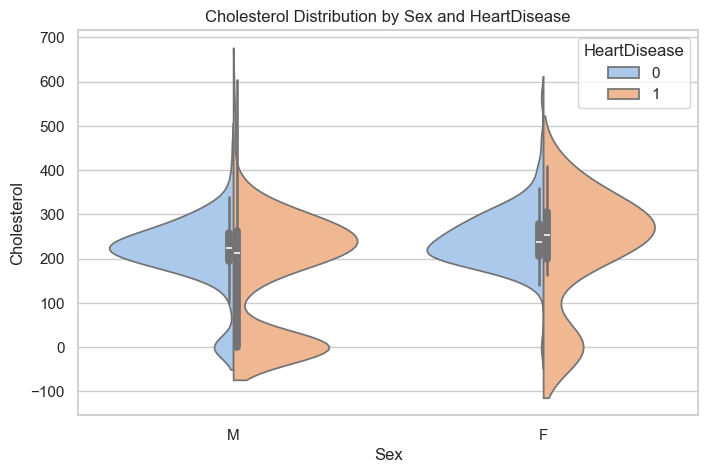

In [25]:
# 4. Violin Plot: Cholesterol vs Sex
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Cholesterol', hue='HeartDisease', data=df, split=True, palette='pastel')
plt.title('Cholesterol Distribution by Sex and HeartDisease')
plt.show()

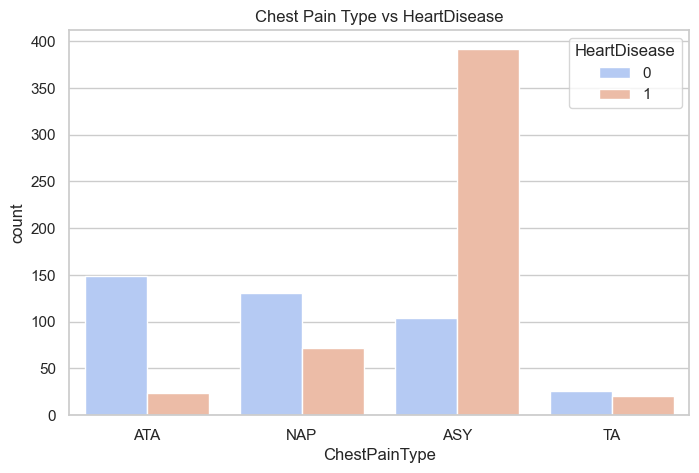

In [26]:
# 5. Countplot: ChestPainType vs HeartDisease
plt.figure(figsize=(8, 5))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='coolwarm')
plt.title('Chest Pain Type vs HeartDisease')
plt.show()

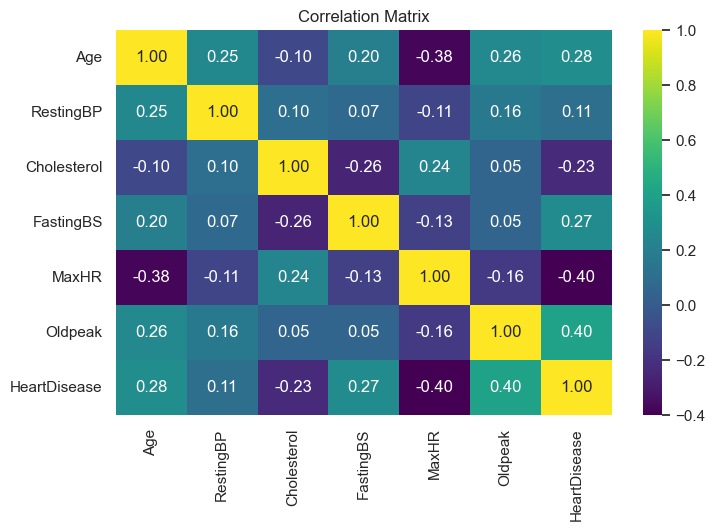

In [27]:
# 6. Heatmap: Correlation Between Numerical Features
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

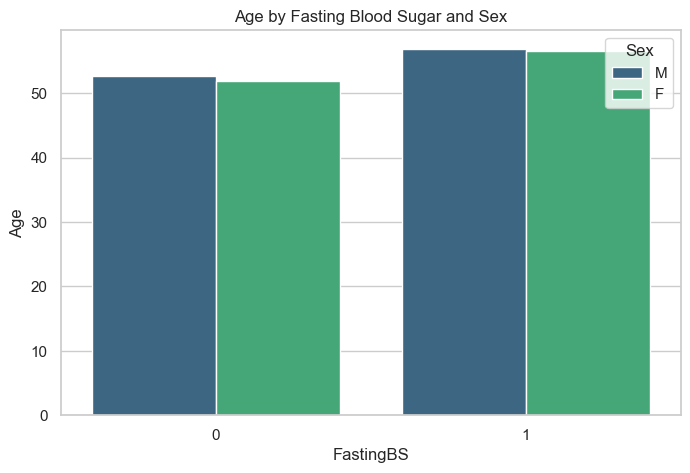

In [28]:
# 7. Barplot: Age vs FastingBS
plt.figure(figsize=(8, 5))
sns.barplot(x='FastingBS', y='Age', hue='Sex', data=df, ci=None, palette='viridis')
plt.title('Age by Fasting Blood Sugar and Sex')
plt.show()

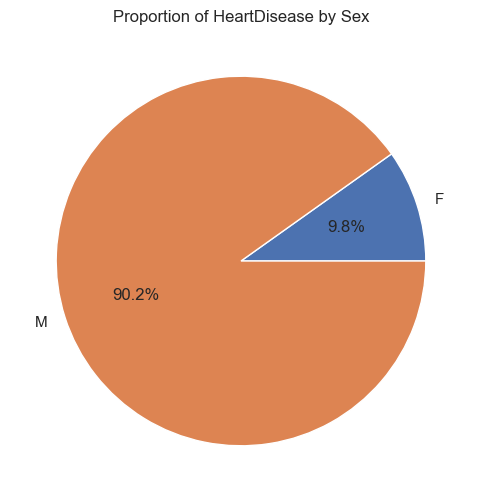

In [29]:
# 8. Pie Chart: Proportion of HeartDisease by Sex
heart_disease_sex = df.groupby('Sex')['HeartDisease'].sum()
plt.figure(figsize=(8, 6))
plt.pie(heart_disease_sex, labels=heart_disease_sex.index, autopct='%1.1f%%')
plt.title('Proportion of HeartDisease by Sex')
plt.show()

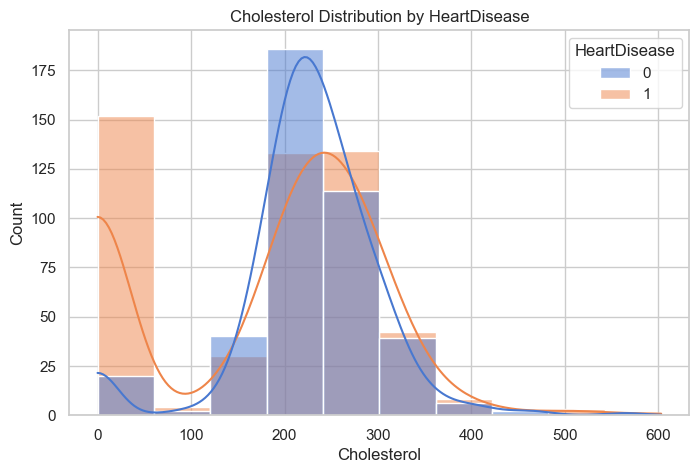

In [30]:
# 9. Histogram: Cholesterol by HeartDisease
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease", kde=True, palette='muted', bins=10)
plt.title('Cholesterol Distribution by HeartDisease')
plt.show()

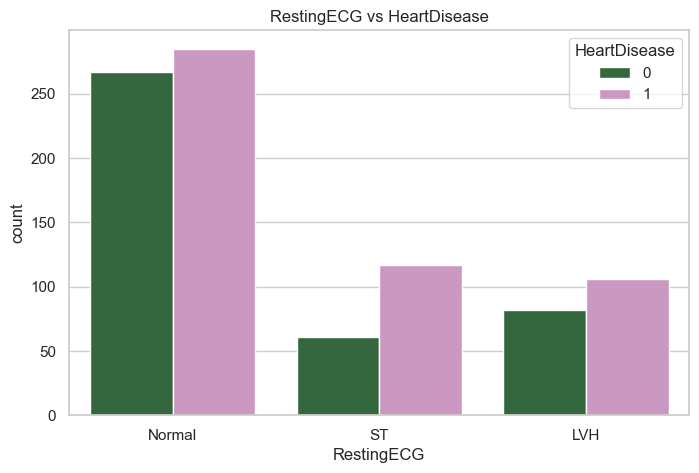

In [31]:
# 10. Countplot: RestingECG vs HeartDisease
plt.figure(figsize=(8, 5))
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, palette='cubehelix')
plt.title('RestingECG vs HeartDisease')
plt.show()

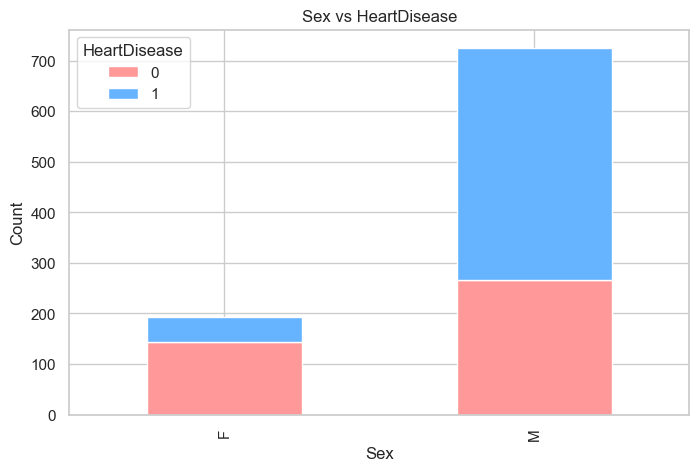

In [32]:
# 11. Stacked Bar Chart: Sex vs HeartDisease
sex_hd = df.groupby(['Sex', 'HeartDisease']).size().unstack()
sex_hd.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'], figsize=(8, 5))
plt.title('Sex vs HeartDisease')
plt.ylabel('Count')
plt.xlabel('Sex')
plt.show()

#Data preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Select columns with categorical data
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the dataset after encoding
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMaxScaler to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the dataset after scaling
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0.0,1,0.788732,0,0.295455,2,0.0
1,0.428571,0,2,0.80,0.298507,0.0,1,0.676056,0,0.409091,1,1.0
2,0.183673,1,1,0.65,0.469320,0.0,2,0.267606,0,0.295455,2,0.0
3,0.408163,0,0,0.69,0.354892,0.0,1,0.338028,1,0.465909,1,1.0
4,0.530612,1,2,0.75,0.323383,0.0,1,0.436620,0,0.295455,2,0.0


#Define the classification model

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [36]:
# Split data into features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Step 3: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "MLP Classifier": MLPClassifier(max_iter=500),
    "Voting Classifier": VotingClassifier(
        estimators=[
            ('lr', LogisticRegression()),
            ('rf', RandomForestClassifier()),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}


In [39]:
# Step 4: Train and Evaluate Models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Dictionary to store evaluation metrics
results = {}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit model
    y_pred = model.predict(X_test)  # Predict labels
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results
for model, metrics in results.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Logistic Regression Performance:
Accuracy: 0.8533
Precision: 0.8612
Recall: 0.8533
F1 Score: 0.8542

K-Nearest Neighbors Performance:
Accuracy: 0.8750
Precision: 0.8788
Recall: 0.8750
F1 Score: 0.8756

Support Vector Classifier Performance:
Accuracy: 0.8696
Precision: 0.8712
Recall: 0.8696
F1 Score: 0.8700

Decision Tree Performance:
Accuracy: 0.7989
Precision: 0.8095
Recall: 0.7989
F1 Score: 0.8002

Random Forest Performance:
Accuracy: 0.8859
Precision: 0.8869
Recall: 0.8859
F1 Score: 0.8861

Gradient Boosting Performance:
Accuracy: 0.8750
Precision: 0.8788
Recall: 0.8750
F1 Score: 0.8756

Naive Bayes Performance:
Accuracy: 0.8424
Precision: 0.8448
Recall: 0.8424
F1 Score: 0.8430

AdaBoost Performance:
Accuracy: 0.8533
Precision: 0.8590
Recall: 0.8533
F1 Score: 0.8541

Bagging Performance:
Accuracy: 0.8424
Precision: 0.8557
Recall: 0.8424
F1 Score: 0.8434

XGBoost Performance:
Accuracy: 0.8696
Precision: 0.8742
Recall: 0.8696
F1 Score: 0.8703

MLP Classifier Performance:
Accuracy: 0.

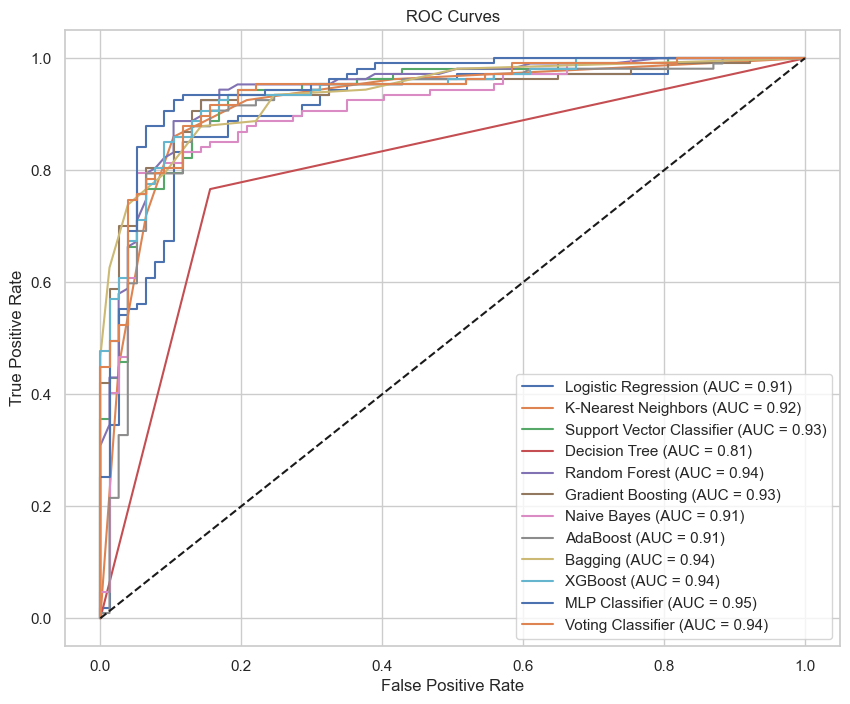

In [40]:
# Step 6: Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

#Conclusion - Ensemble methods (Random Forest, XGBoost, Bagging, and Voting Classifier) and deep learning (MLP Classifier) outperformed traditional models. The MLP Classifier achieved the highest accuracy (88.04%) and AUC (0.95), making it the most effective model. Random Forest, XGBoost, and Bagging also showed strong predictive performance (AUC = 0.94). While Logistic Regression and Naïve Bayes performed reasonably well (AUC ≈ 0.91), Decision Trees struggled with lower accuracy and AUC (0.7989 and 0.81, respectively).